# Task -5 : Credit Card Fraud Detection Project 🕵️‍♂️💳

## Objective 🎯  
The goal of this project is to build a machine learning model to identify fraudulent credit card transactions. This classification problem involves analyzing transaction data and predicting whether a transaction is genuine or fraudulent.  

---

## Dataset Overview 📊  
The dataset consists of features representing transaction details. These include both numerical and categorical data. A typical structure of the dataset includes the following:  

### Key Columns:  
- **TransactionID**: Unique identifier for each transaction.  
- **Amount**: The transaction amount.  
- **Time**: Time elapsed since the first transaction in the dataset.  
- **V1, V2, ..., Vn**: Principal Component Analysis (PCA)-transformed features representing anonymized transaction details.  
- **Class**: Target variable indicating whether a transaction is fraudulent (1) or genuine (0).  

### Data Source:  
This dataset can be accessed from Kaggle [**Credit Card Fraud Detection Dataset**](https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud).  

---

## Steps Involved 🛠️  

### 1. Data Preprocessing 🧹  
- **Handle Missing Data**:  
  Replace missing values (if any) with appropriate imputation techniques (e.g., mean for numerical features).  

- **Feature Scaling**:  
  Normalize numerical features like `Amount` and `Time` using standardization or normalization.  

- **Class Imbalance Handling**:  
  Since fraud detection datasets are typically imbalanced, apply techniques like:  
  - Oversampling (e.g., SMOTE).  
  - Undersampling.  

- **Train-Test Split**:  
  Split the dataset into training and testing sets (e.g., 80%-20%).  

---

### 2. Model Building 🚀  
Train classification models to predict whether a transaction is fraudulent or genuine. Models to consider:  
- **Logistic Regression**: A simple baseline model for binary classification.  
- **Random Forest**: A more complex model that can capture non-linear patterns.  

Use techniques like hyperparameter tuning (e.g., GridSearchCV) to improve model performance.  

---

### 3. Model Evaluation 📏  
Evaluate the model's performance using the following metrics:  
 
- **F1-Score**: A balance between precision and recall.  
 

---

## Steps in Detail 🧩  

### 1. Data Collection and Preprocessing:  
- Load and clean the dataset.  
- Handle class imbalance using SMOTE or undersampling techniques.  
- Scale numerical features like `Amount` and `Time`.  

### 2. Exploratory Data Analysis (EDA):  
- Visualize the distribution of fraudulent and genuine transactions.  
- Analyze correlations between numerical features like `Amount` and `Time`.  

### 3. Model Training and Evaluation:  
- Train models like Logistic Regression, Random Forest, and Gradient Boosting on the training set.  
- Evaluate their performance using precision, recall, and F1-score on the test set.  
- Compare models and select the best one based on the evaluation metrics.  

---

## Expected Outcome ✅  
- A trained model that can accurately identify fraudulent transactions.  
- Performance metrics indicating high recall (to detect most fraudulent transactions) and a balanced F1-score.  

---

### Key Takeaways 📌  
- Handling class imbalance is critical in fraud detection tasks.  
- Using metrics like precision and recall ensures that the model focuses on minimizing false negatives and false positives.  
- Techniques like SMOTE and Random Forests can significantly enhance performance in such imbalanced classification problems.  


### 1️⃣ **Importing Libraries for Data Analysis and Modeling** 📚✨  
This code imports essential libraries for:  
- **Data Manipulation**: `numpy`, `pandas`  
- **Visualization**: `matplotlib`, `seaborn`  
- **Machine Learning Models**: `GaussianNB`, `DecisionTreeClassifier`, `KNeighborsClassifier`, `RandomForestClassifier`, `AdaBoostClassifier`, `XGBClassifier`, and `LogisticRegression`.  
- **Performance Metrics**: `f1_score`.  
- **Timing Execution**: `time`.  

These tools allow for seamless data analysis, visualization, and building predictive models. 🔍📊  


In [1]:
# Import necessary libraries

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
import time

### Reading the Dataset 📂  
This line loads the credit card fraud dataset from the specified file path using the `pandas` library. It specifies the encoding as `'latin1'` to handle special characters in the file. 🚀  


In [2]:
# Try specifying a different encoding like 'latin1' or 'ISO-8859-1'
df = pd.read_csv(r"C:\Users\mdimr\Downloads\CodSoft Intern\Credit card Fraud\creditcard.csv", encoding='latin1')


### Previewing the Dataset 🔍  
The `df.head()` command displays the first 5 rows of the dataset, allowing you to quickly inspect its structure, column names, and initial data. 🧐  


In [3]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


### Dataset Information ℹ️  
The `df.info()` command provides a summary of the dataset, including the number of rows and columns, column data types, and non-null value counts, helping to assess data quality. 📋  


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

### Checking Missing Values 🚨  
- The first line calculates the total number of missing values for each column in the dataset using `df.isnull().sum()`.  
- The second line prints the result, helping identify columns with missing data for further cleaning. 🧹  


In [5]:
# Find missing values in each column
missing_values = df.isnull().sum()

# Display the missing values
print(missing_values)


Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


### Checking Duplicate Rows 🧾  
The `df.duplicated().sum()` command counts the total number of duplicate rows in the dataset, helping to identify redundancy for removal if necessary. 🔄  


In [6]:
df.duplicated().sum()

1081

### Removing Duplicate Rows 🗑️  
The `df.drop_duplicates(inplace=True)` command deletes all duplicate rows from the dataset and updates it in place to ensure data integrity. ✅  


In [7]:
df.drop_duplicates(inplace=True)

### Displaying Data Types 🔠  
The `print(df.dtypes)` command shows the data type of each column in the dataset, helping you identify whether the columns are numerical, categorical, or other types. 🧐  


In [8]:
print(df.dtypes)

Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object


### Converting Data Type 🔄  
The `df['Class'] = df['Class'].astype(str)` command changes the data type of the 'Class' column to a string, which is useful for ensuring consistent handling in classification tasks. 🧩  


In [9]:
df['Class'] = df['Class'].astype(str)

In [10]:
df.dtypes

Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class      object
dtype: object

### Analyzing Numerical Columns 📊  
This function computes key statistical metrics for numerical columns in the DataFrame, including:  
- **Mean**: Average value of the column.  
- **Median**: Middle value of the column.  
- **Variance**: Measure of data spread.  
- **Standard Deviation**: Measure of data dispersion.  
- **Min/Max**: Minimum and maximum values in the column.  
- **Kurtosis**: Measures the "tailedness" of the distribution.  
- **Skewness**: Indicates the asymmetry of the data distribution.  

The results are displayed in a new DataFrame, showing these statistics for each numerical column, rounded to 2 decimal places. 📈  


In [11]:
from scipy.stats import kurtosis, skew

def analyze_numerical_columns(dataframe, numerical_columns):
    """
    Analyzes specified numerical columns in a DataFrame.
    
    Parameters:
    - dataframe: The DataFrame containing the data.
    - numerical_columns: List of numerical column names to analyze.
    
    Returns:
    - result_df: DataFrame containing the analysis results for each column.
    """
    # Initialize an empty list to store results
    results = []

    for column in numerical_columns:
        # Calculate statistics
        mean = dataframe[column].mean()
        median = dataframe[column].median()
        variance = dataframe[column].var()
        std_dev = dataframe[column].std()
        min_val = dataframe[column].min()
        max_val = dataframe[column].max()
        kurt = kurtosis(dataframe[column], nan_policy='omit')
        skewness = skew(dataframe[column], nan_policy='omit')
        
        
        # Append results for this column
        results.append({
            'Column': column,
            'Mean': mean,
            'Median': median,
            'Variance': variance,
            'Kurtosis': kurt,
            'Skewness': skewness,
            'Standard Deviation': std_dev,
            'Min': min_val,
            'Max': max_val,
            
            
        })

    # Convert results to a DataFrame for better visualization
    result_df = pd.DataFrame(results)
    return result_df



# Specify numerical columns to analyze
numerical_columns = df.select_dtypes(include=[int, float]).columns.tolist()
# Analyze the numerical columns
results_df = analyze_numerical_columns(df, numerical_columns)

results_df = results_df.round(2)

# Display the results
results_df

,Column,Mean,Median,Variance,Kurtosis,Skewness,Standard Deviation,Min,Max
0,Time,94811.08,84692.50,2.254450e+09,-1.29,-0.04,47481.05,0.00,172792.00
1,V1,0.01,0.02,3.790000e+00,32.73,-3.27,1.95,-56.41,2.45
2,V2,-0.00,0.06,2.710000e+00,96.90,-4.70,1.65,-72.72,22.06
3,V3,0.00,0.18,2.280000e+00,25.19,-2.15,1.51,-48.33,9.38
4,V4,-0.00,-0.02,2.000000e+00,2.62,0.67,1.41,-5.68,16.88
5,V5,0.00,-0.05,1.900000e+00,209.27,-2.41,1.38,-113.74,34.80
6,V6,-0.00,-0.28,1.770000e+00,42.84,1.83,1.33,-26.16,73.30
7,V7,0.00,0.04,1.510000e+00,414.13,2.89,1.23,-43.56,120.59
8,V8,-0.00,0.02,1.390000e+00,215.01,-8.31,1.18,-73.22,20.01
9,V9,-0.00,-0.05,1.200000e+00,3.52,0.54,1.10,-13.43,15.59


### Visualizing Distribution of Numerical Columns 📊  
This code generates histograms for all numerical columns in the dataset (excluding 'PassengerId') to visualize their distributions.  
- **Histograms**: Show the frequency distribution of values.  
- **Kernel Density Estimate (KDE)**: Smooth line representing the probability density function.  

The histograms are plotted in a grid, with figure size adjusted based on the number of columns, and labels and titles are customized for clarity. 🎨  


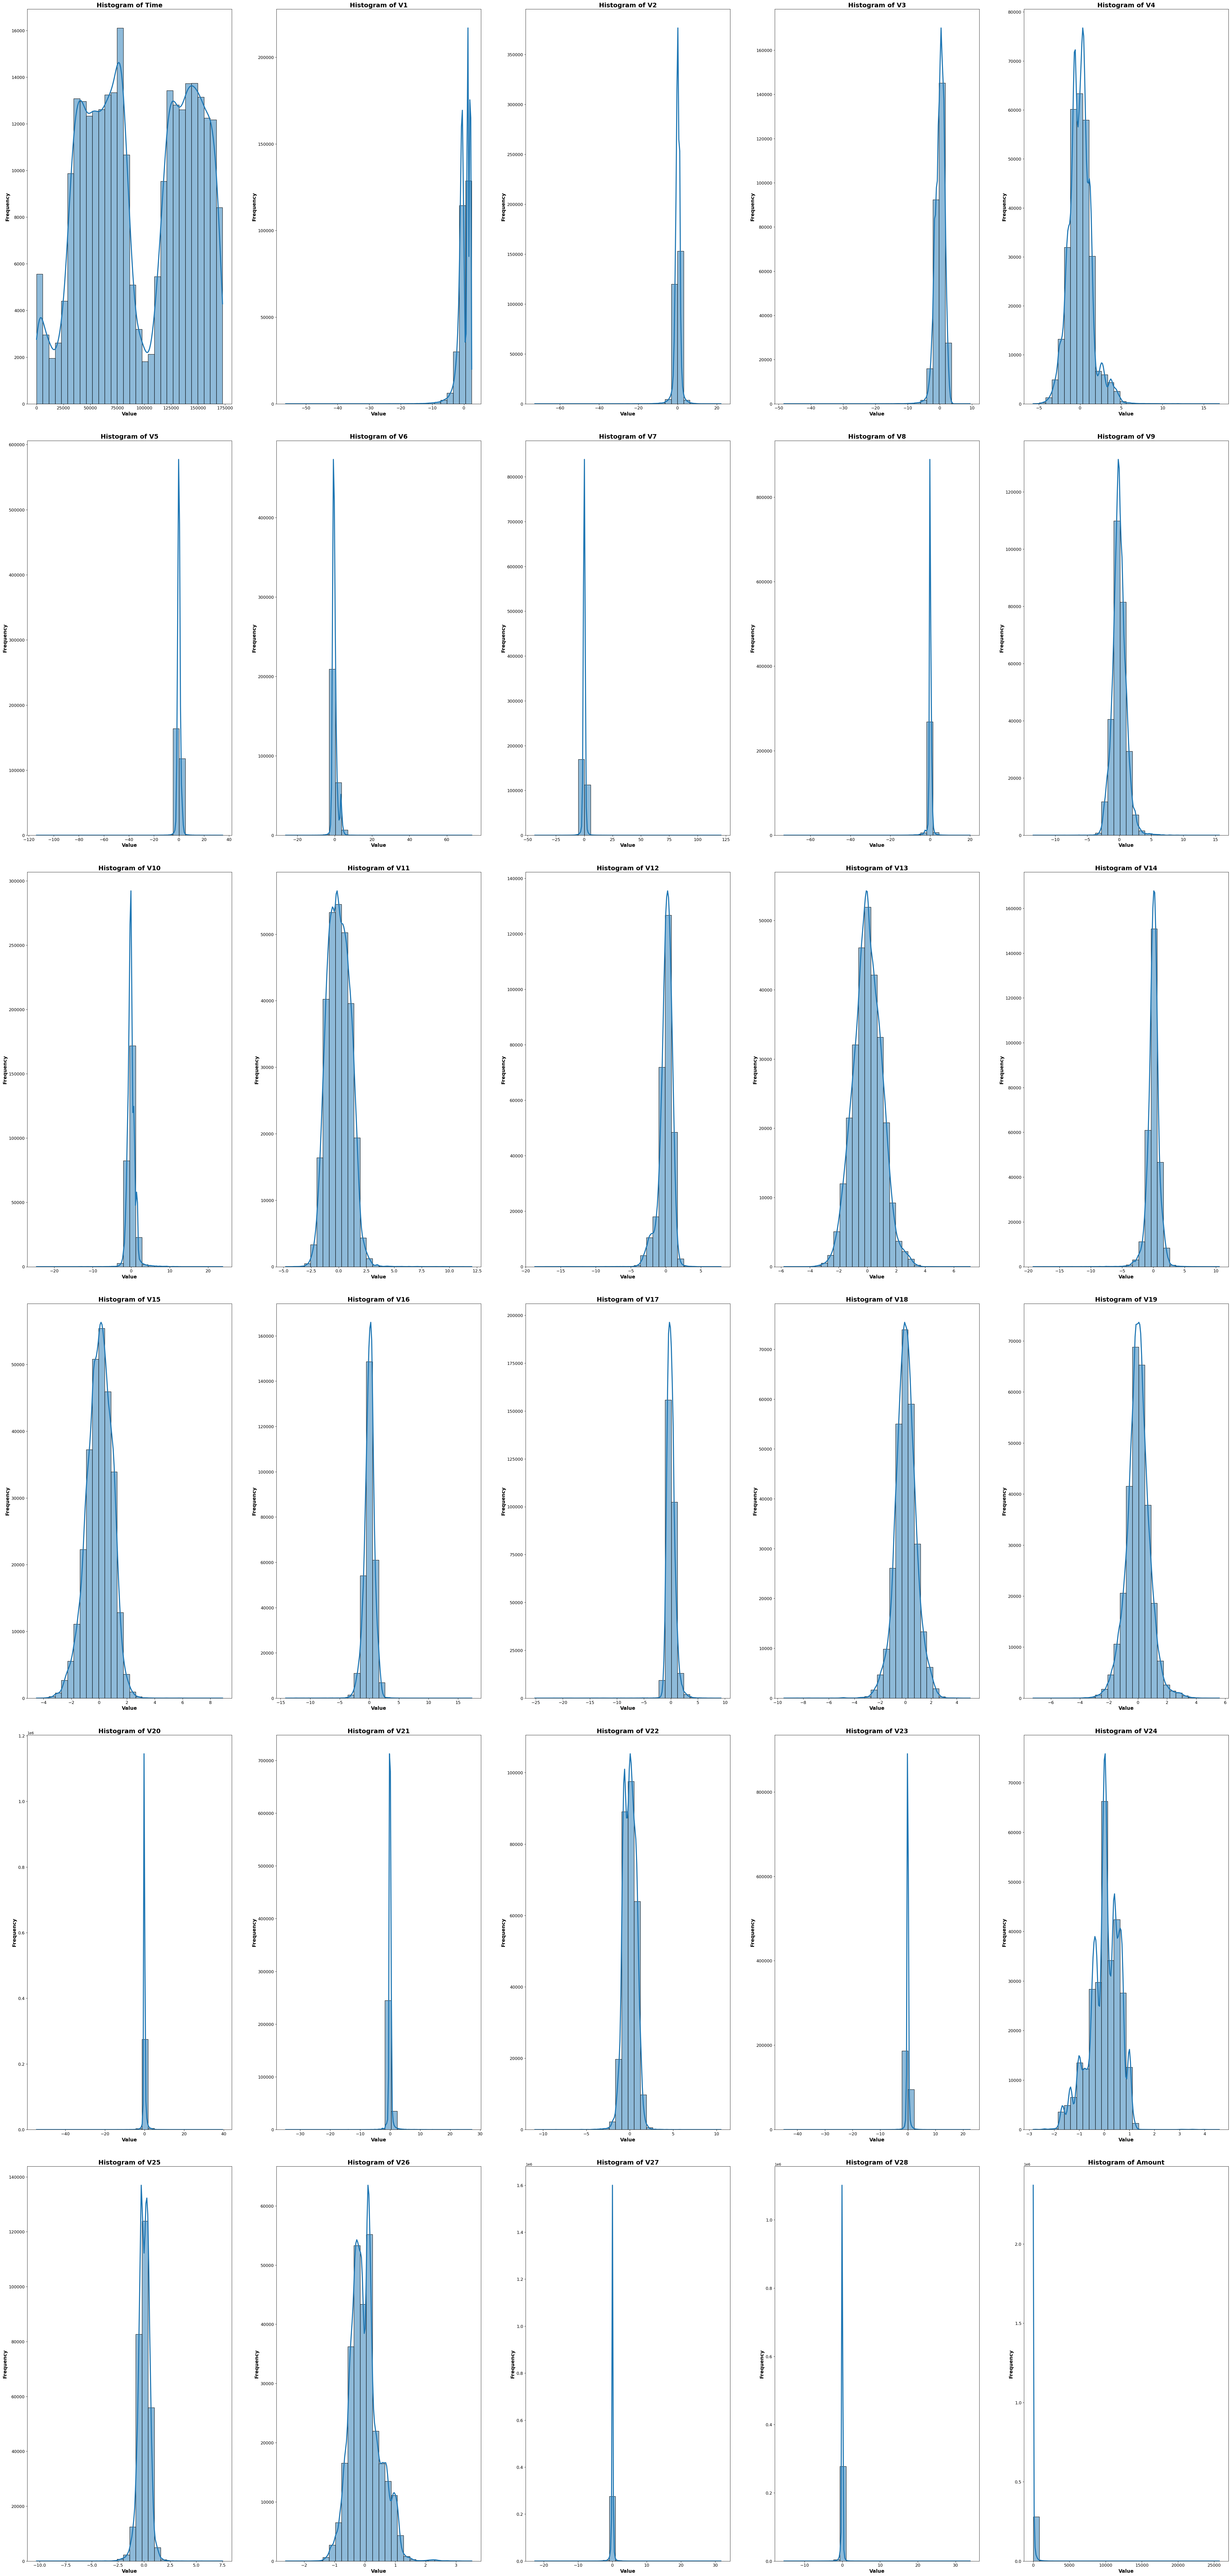

In [12]:
# Select numerical columns of dtype 'float64', excluding 'PassengerId'
numerical_cols = df.select_dtypes(include=['int64','float64']).columns


# Set figure size
plt.figure(figsize=(50, len(numerical_cols) * 4))  # Adjust height based on number of columns

# Plot histograms for each numerical column
for i, col in enumerate(numerical_cols):
    plt.subplot(len(numerical_cols) // 5 + 1, 5, i + 1)
    sns.histplot(df[col], bins=30, kde=True, line_kws={'linewidth': 3})
    plt.title(f'Histogram of {col}', fontsize=18, fontweight='bold')
    plt.xlabel('Value', fontsize=14, fontweight='bold')
    plt.ylabel('Frequency', fontsize=14, fontweight='bold')
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)

plt.tight_layout(pad=5.0)
plt.show()


### Visualizing Class Distribution ⚖️  
This code creates a count plot to visualize the distribution of fraudulent vs. non-fraudulent transactions in the 'Class' column.  
- **Count Plot**: Displays the frequency of each class (fraud or non-fraud) using bars.  
- **Title & Labels**: Provide context for the plot, with the 'Class' column indicating 0 for non-fraud and 1 for fraud.  

The plot helps identify class imbalances, crucial for addressing any potential bias in the model. 🔍  


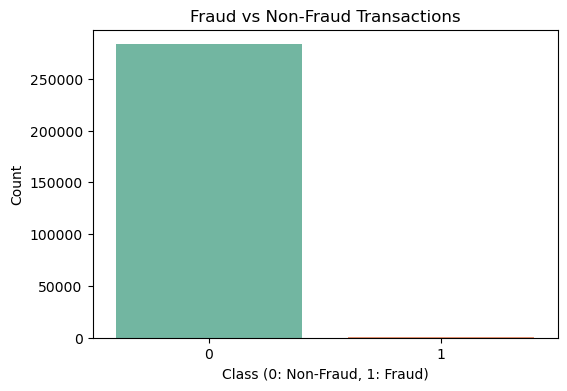

In [13]:
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='Class', palette='Set2')
plt.title('Fraud vs Non-Fraud Transactions')
plt.xlabel('Class (0: Non-Fraud, 1: Fraud)')
plt.ylabel('Count')
plt.show()

### Transaction Amount Distribution by Class 💳  
This code generates a stacked histogram to visualize the distribution of transaction amounts, with differentiation between fraudulent and non-fraudulent transactions using color (`hue='Class'`).  
- **Stacked Histogram**: Represents the frequency of transaction amounts for both classes (fraud and non-fraud) on the same plot.  
- **Palette**: Colors the bars based on the class of the transaction (fraud or non-fraud).

This visualization helps to understand the spread of transaction amounts across both classes. 💰  


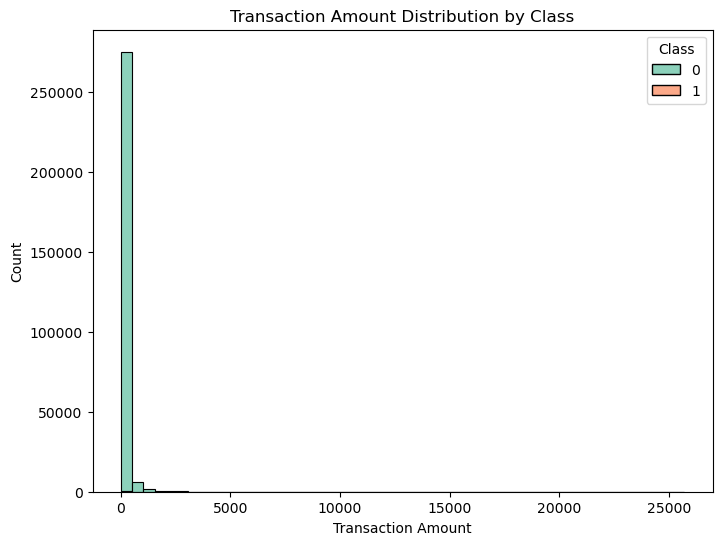

In [15]:
plt.figure(figsize=(8, 6))
sns.histplot(data=df, x='Amount', hue='Class', multiple='stack', palette='Set2', bins=50)
plt.title('Transaction Amount Distribution by Class')
plt.xlabel('Transaction Amount')
plt.ylabel('Count')
plt.show()

### Time vs Transaction Amount 🕒💸  
This code creates a scatter plot to visualize the relationship between the transaction time and the transaction amount, with points colored by transaction class (fraud or non-fraud).  
- **Scatter Plot**: Shows the distribution of 'Time' against 'Amount' for each transaction.  
- **Hue**: Differentiates between fraudulent and non-fraudulent transactions using color.

This visualization helps identify any patterns or trends related to the timing and amount of transactions. 🔍  


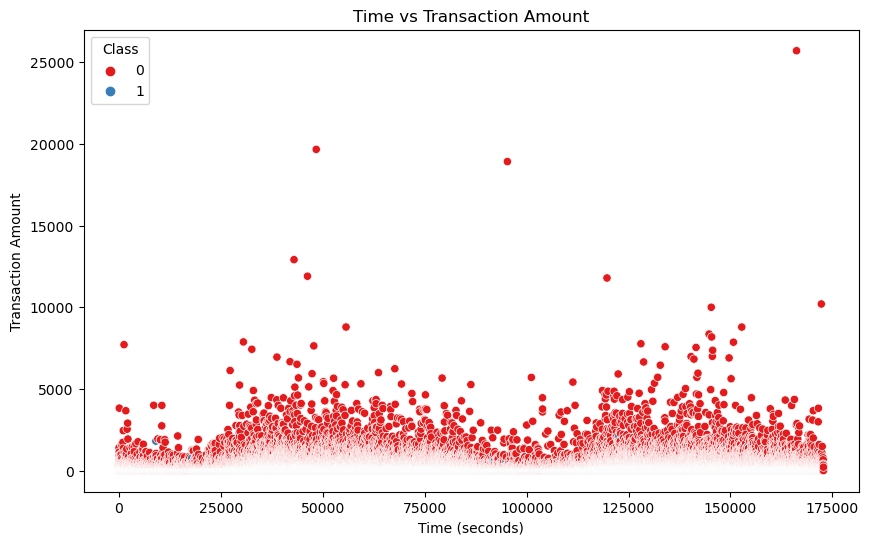

In [16]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Time', y='Amount', hue='Class', palette='Set1')
plt.title('Time vs Transaction Amount')
plt.xlabel('Time (seconds)')
plt.ylabel('Transaction Amount')
plt.show()

### Transaction Amount Distribution by Class (Fraud vs Non-Fraud) 📊  
This code generates a box plot to visualize the distribution of transaction amounts for both fraudulent and non-fraudulent transactions.  
- **Box Plot**: Displays the spread of transaction amounts, highlighting the median, quartiles, and potential outliers.  
- **Palette**: Uses different colors to represent the fraud (1) and non-fraud (0) classes.

This visualization helps to identify any significant differences in transaction amounts between fraudulent and non-fraudulent transactions. 💳  


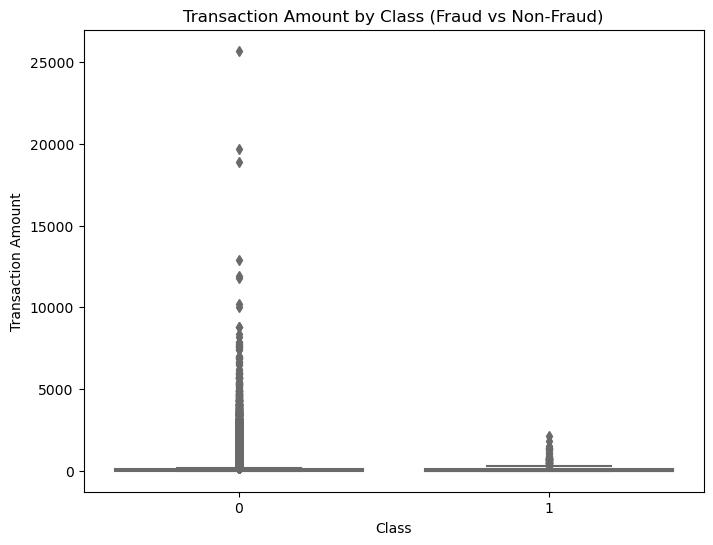

In [17]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='Class', y='Amount', palette='Set3')
plt.title('Transaction Amount by Class (Fraud vs Non-Fraud)')
plt.xlabel('Class')
plt.ylabel('Transaction Amount')
plt.show()

### Feature V1 Distribution by Class 🎻  
This code creates a violin plot to visualize the distribution of the feature 'V1' for both fraudulent and non-fraudulent transactions.  
- **Violin Plot**: Combines aspects of a box plot and a kernel density plot to show the distribution of the 'V1' feature for each class.  
- **Palette**: Differentiates between fraud (1) and non-fraud (0) using color.

The plot reveals the spread and density of 'V1' values, helping to assess class separation. 📊  


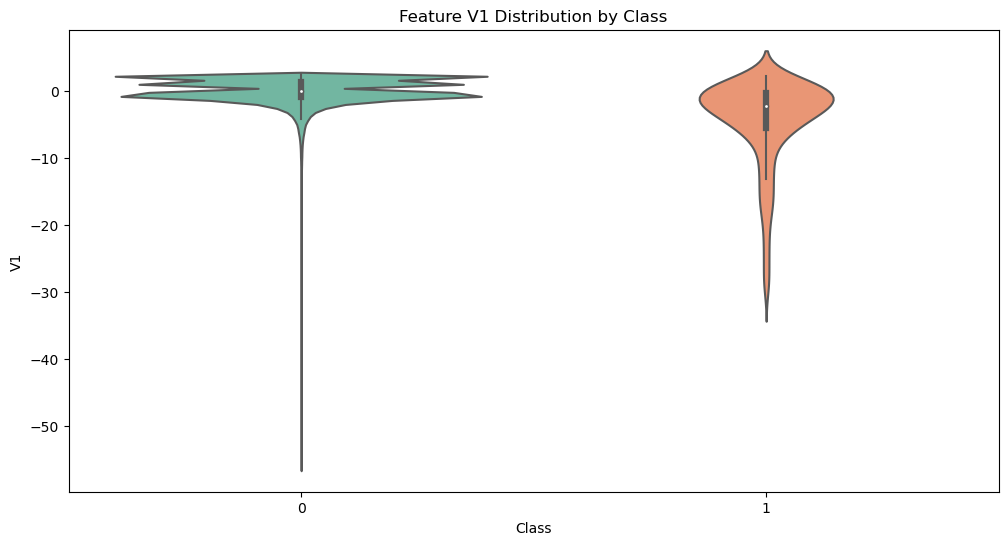

In [23]:
plt.figure(figsize=(12, 6))
sns.violinplot(data=df, x='Class', y='V1', palette='Set2')
plt.title('Feature V1 Distribution by Class')
plt.show()


### Class Distribution (Fraud vs Non-Fraud) 📊  
This code returns the count of occurrences for each class in the 'Class' column, showing the distribution of fraudulent (1) and non-fraudulent (0) transactions.  
- **Value Counts**: Displays the total number of transactions for each class.  
- **Insight**: Helps identify any class imbalance in the dataset, which is critical for handling during model training.

This output is useful for understanding the need for techniques like oversampling or undersampling to address imbalanced classes. ⚖️  


In [24]:
df['Class'].value_counts()

0    283253
1       473
Name: Class, dtype: int64

### Defining Features and Target for Classification 🔍  
This code defines the features (X) and target (y) for a classification task.  
- **X (Features)**: Drops the 'Class' column, leaving all other columns as features for the model.  
- **y (Target)**: The 'Class' column is used as the target variable to predict fraudulent (1) or non-fraudulent (0) transactions.

This setup is essential for building and training a classification model to detect credit card fraud. 💳  
  


In [27]:
X = df.drop(columns='Class', axis=1)
y =df['Class']

### Splitting the Data into Train, Validation, and Test Sets 🔀  
This code splits the dataset into training, validation, and testing sets for model training and evaluation.  
- **Step 1**: 80% of the data is used for training (`X_train`, `y_train`), and the remaining 20% is assigned to a temporary set (`X_temp`, `y_temp`).
- **Step 2**: The temporary set is further split into 50% validation (`X_val`, `y_val`) and 50% testing (`X_test`, `y_test`), resulting in 10% for validation and 10% for testing of the original dataset.

The output shows the shapes of each split, confirming the data partitioning. 📊  


In [28]:
from sklearn.model_selection import train_test_split

# Step 1: Split into 80% train and 20% temporary (test + validation)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.20, random_state=45)

# Step 2: Split the temporary set into 50% test and 50% validation (which is 10% each of the original data)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=45)


print(X_train.shape, y_train.shape)
print(X_val.shape, y_val.shape)
print(X_test.shape, y_test.shape)


(226980, 30) (226980,)
(28373, 30) (28373,)
(28373, 30) (28373,)


### Separating Categorical and Numerical Columns 📊  
This code splits the training, validation, and testing datasets into categorical and numerical columns.  
- **Categorical Columns**: Columns of type 'object', 'datetime64', or 'timedelta64' are separated for encoding or other categorical processing.  
- **Numerical Columns**: Columns of type 'int64' or 'float64' are separated for scaling or other numerical transformations.

This approach allows different preprocessing techniques to be applied to categorical and numerical features. 🔢  


In [29]:
# Separating Categorical and Numerical Columns

X_train_cat = X_train.select_dtypes(include=['object','datetime64[ns]','timedelta64[ns]'])
X_train_num = X_train.select_dtypes(include=['int64', 'float64'])


# Separating Categorical and Numerical Columns

X_val_cat = X_val.select_dtypes(include=['object','datetime64[ns]','timedelta64[ns]'])
X_val_num = X_val.select_dtypes(include=['int64', 'float64'])


# Separating Categorical and Numerical Columns

X_test_cat = X_test.select_dtypes(include=['object','datetime64[ns]','timedelta64[ns]'])
X_test_num = X_test.select_dtypes(include=['int64', 'float64'])

### Rescaling Numerical Features 🔄  
This code applies **StandardScaler** to rescale the numerical features in the training set.  
- **Standardization**: Each numerical feature is scaled to have a mean of 0 and a standard deviation of 1.  
- The transformed data is converted back to a DataFrame with the original column names restored.

The output shows the shape of the transformed training data, confirming that the scaling process has been applied. 📐  


In [30]:
# Rescaling numerical features
from sklearn.preprocessing import StandardScaler

std_scaler = StandardScaler()

# column names are (annoyingly) lost after Scaling
# (i.e. the dataframe is converted to a numpy ndarray)
X_train_num_transformed = pd.DataFrame(std_scaler.fit_transform(X_train_num), 
                                    columns = std_scaler.get_feature_names_out(), 
                                    index = X_train_num.index)

X_train_num_transformed.shape

(226980, 30)

### Rescaling Validation Features 🔄  
This code applies **StandardScaler** to the numerical features of the validation set.  
- **Transformation**: The previously fitted scaler (from the training set) is used to scale the validation data, ensuring consistency in feature scaling between training and validation sets.  
- The transformed data is converted into a DataFrame with the original column names restored.

The output displays the shape of the transformed validation data, indicating that the scaling was applied correctly. 📊  


In [31]:
# column names are (annoyingly) lost after Scaling
# (i.e. the dataframe is converted to a numpy ndarray)
X_val_num_transformed = pd.DataFrame(std_scaler.transform(X_val_num), 
                                    columns = std_scaler.get_feature_names_out(), 
                                    index = X_val_num.index)

X_val_num_transformed.shape

(28373, 30)

### Rescaling Test Features 🔄  
This code applies **StandardScaler** to the numerical features of the test set.  
- **Transformation**: The previously fitted scaler (from the training set) is used to scale the test data, ensuring consistency in feature scaling between training, validation, and test sets.  
- The transformed data is converted into a DataFrame with the original column names restored.

The output shows the shape of the transformed test data, confirming the scaling operation was successfully performed. 📊  


In [32]:

# column names are (annoyingly) lost after Scaling
# (i.e. the dataframe is converted to a numpy ndarray)
X_test_num_transformed = pd.DataFrame(std_scaler.transform(X_test_num), 
                                    columns = std_scaler.get_feature_names_out(), 
                                    index = X_test_num.index)

X_test_num_transformed.shape

(28373, 30)

### Model Initialization 🧑‍💻  
This code initializes a dictionary `models` containing various machine learning classifiers for comparison:  
- **GaussianNB** for Naive Bayes
- **DecisionTreeClassifier** for Decision Tree
- **KNeighborsClassifier** for K-Nearest Neighbors
- **RandomForestClassifier** for Random Forest
- **AdaBoostClassifier** for AdaBoost
- **LogisticRegression** for Logistic Regression with a maximum of 1000 iterations

A separate dictionary `results` is also created to store the performance metrics of each model. 📊  


In [38]:
# Updated models dictionary (still using GaussianNB instead of MultinomialNB)
models = {
    'Naviebayes':GaussianNB(),
    'DecisionTree': DecisionTreeClassifier(),
    'KNeighbors': KNeighborsClassifier(),
    'RandomForest': RandomForestClassifier(),
    
    'AdaBoost': AdaBoostClassifier(),
    'LogisticRegression': LogisticRegression(max_iter=1000)
}

# Dictionary to store results
results = {}

### Model Training and Evaluation 🏋️‍♂️

The code trains and evaluates each model using the following steps:
1. **Training**: Each model from the `models` dictionary is trained on the transformed numerical training set (`X_train_num_transformed`) and the time taken is recorded.
2. **Validation Prediction**: After training, each model makes predictions on the validation set (`X_val_num_transformed`), and the time taken for predictions is recorded.
3. **Validation F1 Score**: The weighted F1 score is calculated for the validation set predictions.
4. **Test Prediction**: The model then predicts on the test set (`X_test_num_transformed`) and the time for prediction is recorded.
5. **Test F1 Score**: The weighted F1 score is calculated for the test set predictions.

The results for each model, including training time, validation prediction time, validation F1 score, test prediction time, and test F1 score, are stored in the `results` dictionary and printed.

This loop gives insights into each model's performance in terms of training speed and prediction quality for both validation and test sets. ⏱️📊


In [40]:
# Train and evaluate each model
for model_name, model in models.items():
    print(f"\nTraining Using OneHotEncoder and Standardization.... {model_name}...")
    
    # Train the model and record training time
    start_time = time.time()
    model.fit( X_train_num_transformed, y_train)
    train_time = time.time() - start_time
    
    # Predict on the validation set and record prediction time
    start_time = time.time()
    y_val_pred = model.predict(X_val_num_transformed)
    val_time = time.time() - start_time
    
    # Compute validation F1 score
    val_f1 = f1_score(y_val, y_val_pred, average='weighted')
    
    # Predict on the test set and record prediction time
    start_time = time.time()
    y_test_pred = model.predict(X_test_num_transformed)
    test_time = time.time() - start_time
    
    # Compute test F1 score
    test_f1 = f1_score(y_test, y_test_pred, average='weighted')
    
    # Store results
    results[model_name] = {
        'Train Time': train_time,
        'Val Prediction Time': val_time,
        'Val F1 Score': val_f1,
        'Test Prediction Time': test_time,
        'Test F1 Score': test_f1
    }
    
    # Print results for the model
    print(f"{model_name} - Train Time: {train_time:.4f}s, Val F1 Score: {val_f1:.4f}, Test F1 Score: {test_f1:.4f}")


Training Using OneHotEncoder and Standardization.... Naviebayes...
Naviebayes - Train Time: 1.9845s, Val F1 Score: 0.9873, Test F1 Score: 0.9872

Training Using OneHotEncoder and Standardization.... DecisionTree...
DecisionTree - Train Time: 84.0540s, Val F1 Score: 0.9989, Test F1 Score: 0.9991

Training Using OneHotEncoder and Standardization.... KNeighbors...
KNeighbors - Train Time: 1.3578s, Val F1 Score: 0.9994, Test F1 Score: 0.9994

Training Using OneHotEncoder and Standardization.... RandomForest...
RandomForest - Train Time: 710.3125s, Val F1 Score: 0.9994, Test F1 Score: 0.9994

Training Using OneHotEncoder and Standardization.... AdaBoost...


C:\Users\mdimr\AppData\Roaming\Python\Python311\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning:

The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.



AdaBoost - Train Time: 296.3240s, Val F1 Score: 0.9992, Test F1 Score: 0.9990

Training Using OneHotEncoder and Standardization.... LogisticRegression...
LogisticRegression - Train Time: 3.0144s, Val F1 Score: 0.9990, Test F1 Score: 0.9991


### Model Performance Comparison

1. **Training Time Comparison**:  
   A bar plot showing the time each model took to train. This helps identify which models are faster or computationally more expensive.

2. **F1 Scores (Validation vs. Test)**:  
   A grouped bar chart comparing the F1 scores on validation and test sets. This allows for quick performance comparison across models.

3. **Overfitting/Underfitting**:  
   A line plot comparing validation and test F1 scores to detect potential overfitting (if validation score is much higher) or underfitting (if both scores are low).


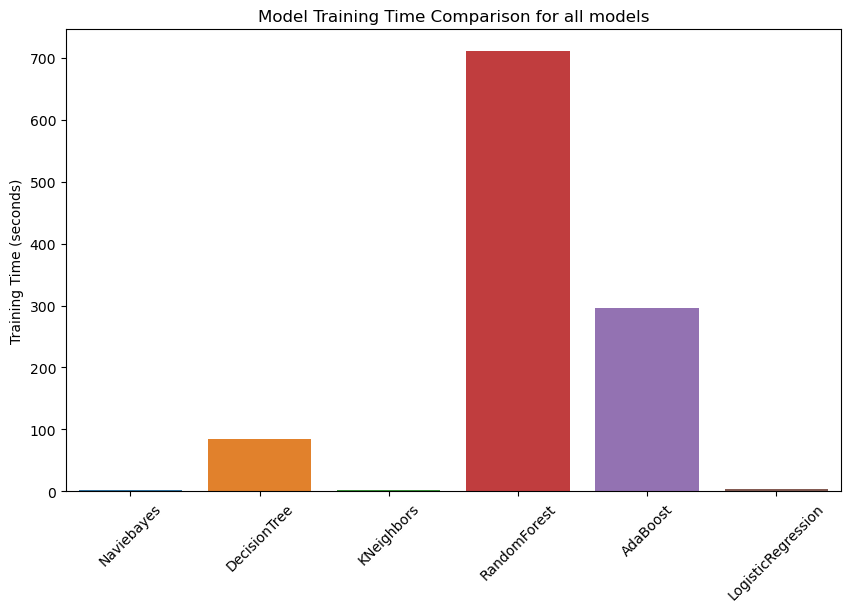

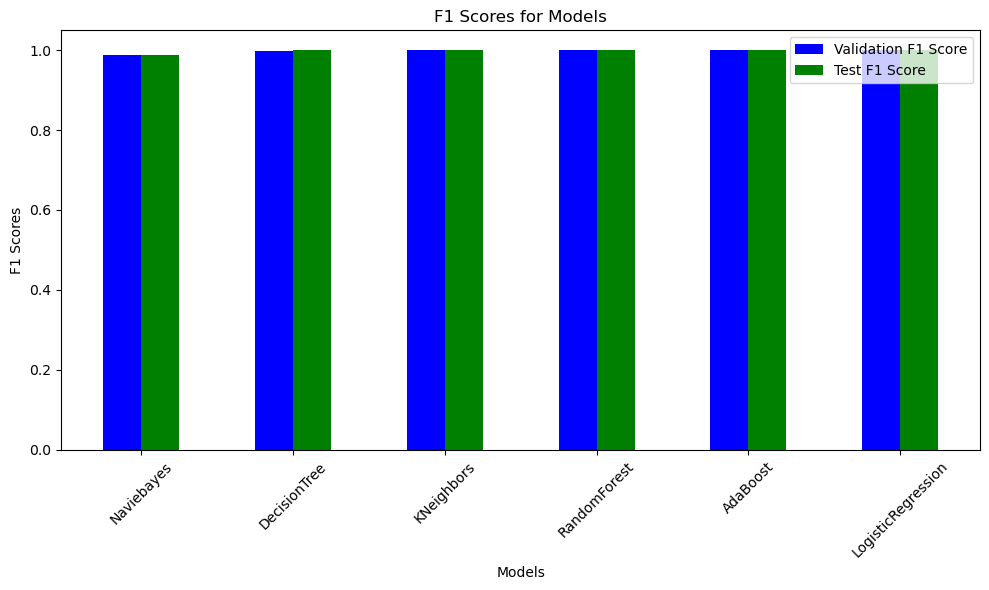

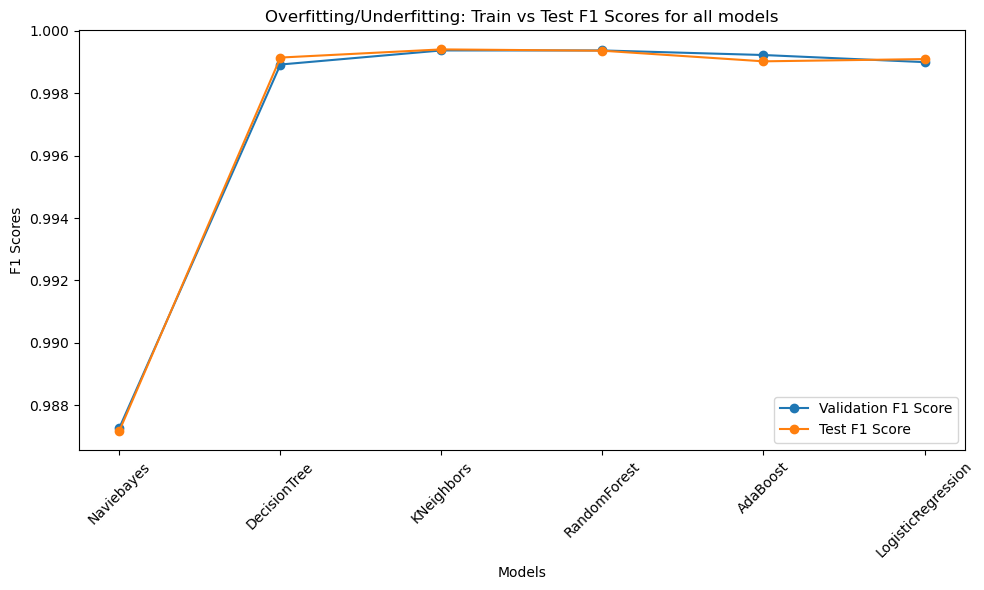

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns

# Extracting results for plotting
models_list = list(results.keys())
train_times = [results[model]['Train Time'] for model in models_list]
val_f1_scores = [results[model]['Val F1 Score'] for model in models_list]
test_f1_scores = [results[model]['Test F1 Score'] for model in models_list]

# Plot: Training Time comparison
plt.figure(figsize=(10, 6))
sns.barplot(x=models_list, y=train_times)
plt.title('Model Training Time Comparison for all models')
plt.ylabel('Training Time (seconds)')
plt.xticks(rotation=45)
plt.show()

# Plot: F1 Scores Comparison (Training, Validation, Test)
fig, ax = plt.subplots(figsize=(10, 6))
bar_width = 0.25
index = range(len(models_list))

# Plot training F1 scores
ax.bar(index, val_f1_scores, bar_width, label='Validation F1 Score', color='b')
ax.bar([i + bar_width for i in index], test_f1_scores, bar_width, label='Test F1 Score', color='g')

ax.set_xlabel('Models')
ax.set_ylabel('F1 Scores')
ax.set_title('F1 Scores for Models')
ax.set_xticks([i + bar_width / 2 for i in index])
ax.set_xticklabels(models_list, rotation=45)
ax.legend()

plt.tight_layout()
plt.show()

# Plot: Overfitting / Underfitting (Train vs Test F1 Scores)
plt.figure(figsize=(10, 6))
plt.plot(models_list, val_f1_scores, label='Validation F1 Score', marker='o')
plt.plot(models_list, test_f1_scores, label='Test F1 Score', marker='o')
plt.xlabel('Models')
plt.ylabel('F1 Scores')
plt.title('Overfitting/Underfitting: Train vs Test F1 Scores for all models')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

## Conclusion

After evaluating all models, **Logistic Regression** stands out as the best model due to the following reasons:

- **Training Time**: It has a fast training time of 3.01 seconds, making it efficient.
- **High Accuracy**: The model achieved an impressive **F1 score** of 0.9990 on the validation set and 0.9991 on the test set, demonstrating excellent accuracy.
- **No Overfitting**: The similar performance on both validation and test sets suggests that the model is well-regularized and does not overfit, ensuring good generalization.

Overall, **Logistic Regression** is the most reliable and efficient model among all the evaluated models.
